# 1) IMPORT & INSTALL PACKAGES

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

%matplotlib inline
pylab.rcParams['figure.figsize'] = 6,4

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# 2) DATA UNDERSTANDING

## 2.1) Load Data

In [48]:
# Import from

path = "input/"
df_train = pd.read_csv(path+"churn_data_train.csv",encoding='latin-1')
df_test = pd.read_csv(path+"churn_data_test.csv",encoding='latin-1')

## 2.2) Data Exploration

In [49]:
df_train.shape, df_test.shape

((4577, 21), (2466, 20))

In [50]:
df_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,...,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,...,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,...,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,...,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.3,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,...,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,...,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [51]:
df_test.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal
0,ID03436,Masculino,0.0,No,No,1.0,Si,No,DSL,Si,No,No,No,No,No,Mes a mes,No,Checke por correo,47.95,47.95
1,ID05166,Femenino,0.0,Si,Si,62.0,Si,Si,Fibra Optica,No,Si,Si,Si,Si,Si,Anual,Si,Checke por correo,110.80,6840.95
2,ID04004,Femenino,0.0,Si,No,7.0,Si,No,Fibra Optica,No,No,Si,No,Si,No,Mes a mes,Si,Checke por correo,86.25,587.1
3,ID05309,Femenino,1.0,Si,No,50.0,Si,Si,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Anual,No,Checke por correo,25.20,1306.3
4,ID05434,Masculino,0.0,Si,Si,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,NaN,19.2


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 21 columns):
ID                        4577 non-null object
Sexo                      4577 non-null object
AdultoMayor               4503 non-null float64
Socio                     4548 non-null object
Dependientes              4577 non-null object
MesesCliente              4573 non-null float64
ServicioTelefonico        4577 non-null object
LineasMultiples           4577 non-null object
ServicioInternet          4577 non-null object
SeguridadOnline           4483 non-null object
RespaldoOnline            4483 non-null object
ProteccionDispositivo     4483 non-null object
SoporteTecnico            4483 non-null object
TransmisionTV             4483 non-null object
TransmisionPeliculas      4483 non-null object
TerminoContrato           4577 non-null object
FacturacionElectronica    4531 non-null object
MetodoPago                4577 non-null object
MontoCargadoMes           4163 non-null float

In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 20 columns):
ID                        2466 non-null object
Sexo                      2466 non-null object
AdultoMayor               2414 non-null float64
Socio                     2447 non-null object
Dependientes              2466 non-null object
MesesCliente              2459 non-null float64
ServicioTelefonico        2466 non-null object
LineasMultiples           2466 non-null object
ServicioInternet          2466 non-null object
SeguridadOnline           2404 non-null object
RespaldoOnline            2404 non-null object
ProteccionDispositivo     2404 non-null object
SoporteTecnico            2404 non-null object
TransmisionTV             2404 non-null object
TransmisionPeliculas      2404 non-null object
TerminoContrato           2466 non-null object
FacturacionElectronica    2442 non-null object
MetodoPago                2466 non-null object
MontoCargadoMes           2267 non-null float

In [54]:
# Defining features types
ID = 'ID'
TARGET = 'Churn'

In [55]:
# Distribución del Target
df_train[TARGET].value_counts(dropna=False)

0    3362
1    1215
Name: Churn, dtype: int64

In [56]:
df_train[TARGET].value_counts(dropna=False, normalize = True)*100

0    73.454228
1    26.545772
Name: Churn, dtype: float64

In [57]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(str) # Convertir a variable categorica
df_test['AdultoMayor'] = df_test['AdultoMayor'].astype(str) # Convertir a variable categorica

In [58]:
# Arreglando valores " " en esta columna
df_train.MontoCargadoTotal= df_train.MontoCargadoTotal.replace(" ",0)
df_train.MontoCargadoTotal = df_train.MontoCargadoTotal.astype(float)

df_test.MontoCargadoTotal= df_test.MontoCargadoTotal.replace(" ",0)
df_test.MontoCargadoTotal = df_test.MontoCargadoTotal.astype(float)

In [59]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4577,4577,ID04961,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,4577,2,Masculino,2323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,4577,3,0.0,3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socio,4548,2,No,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,4577,2,No,3216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,4573,NaN,NaN,NaN,32.4083,24.6555,1,9,29,56,72
ServicioTelefonico,4577,2,Si,4118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,4577,3,No,2205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,4577,3,Fibra Optica,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,4483,3,No,2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2466,2466,ID05624,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,2466,2,Femenino,1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,2466,3,0.0,2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socio,2447,2,No,1225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,2466,2,No,1717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,2459,NaN,NaN,NaN,32.4469,24.344,1,9,29,55,72
ServicioTelefonico,2466,2,Si,2243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,2466,3,No,1185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,2466,3,Fibra Optica,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,2404,3,No,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(float) # Convertir a variable numerica
df_test['AdultoMayor'] = df_test['AdultoMayor'].astype(float) 

## 2.3) Evaluate missings

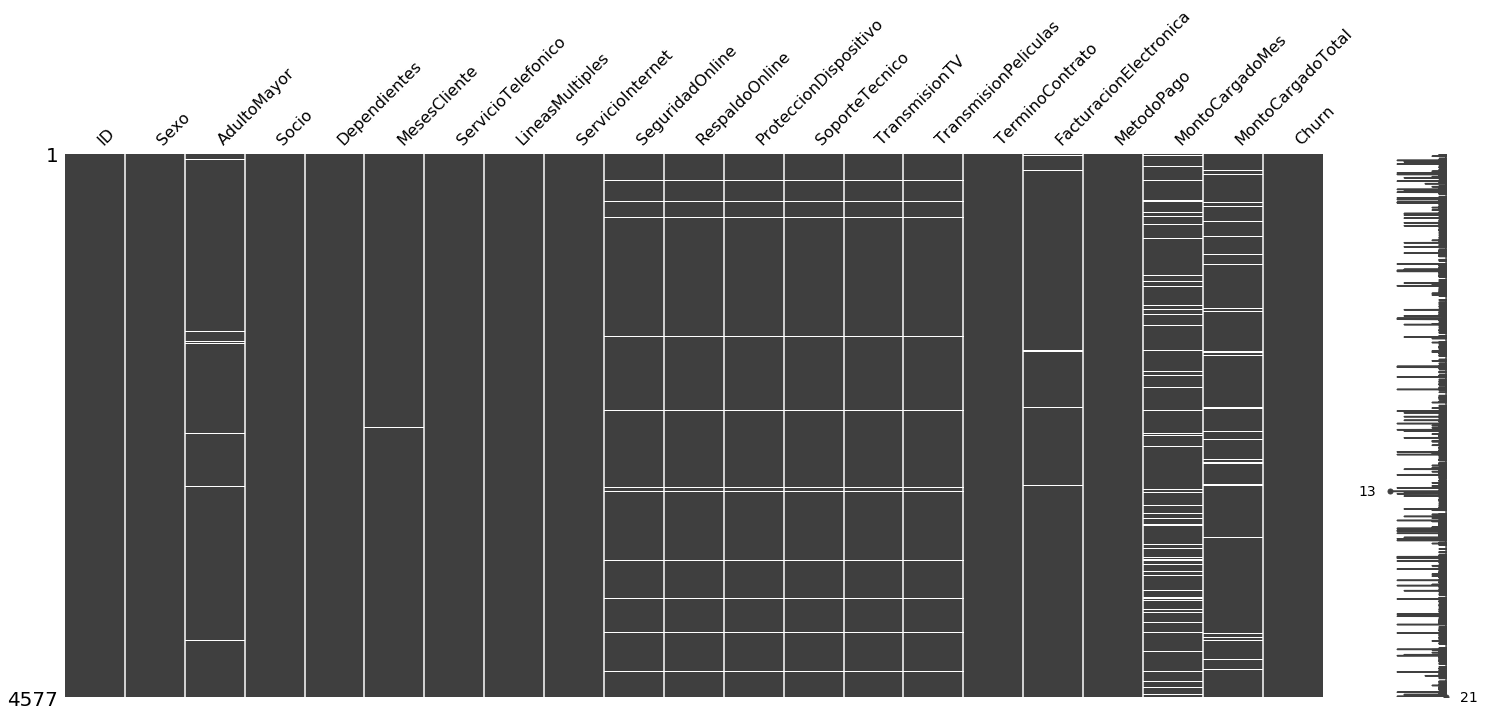

In [62]:
import missingno as msno

msno.matrix(df_train)

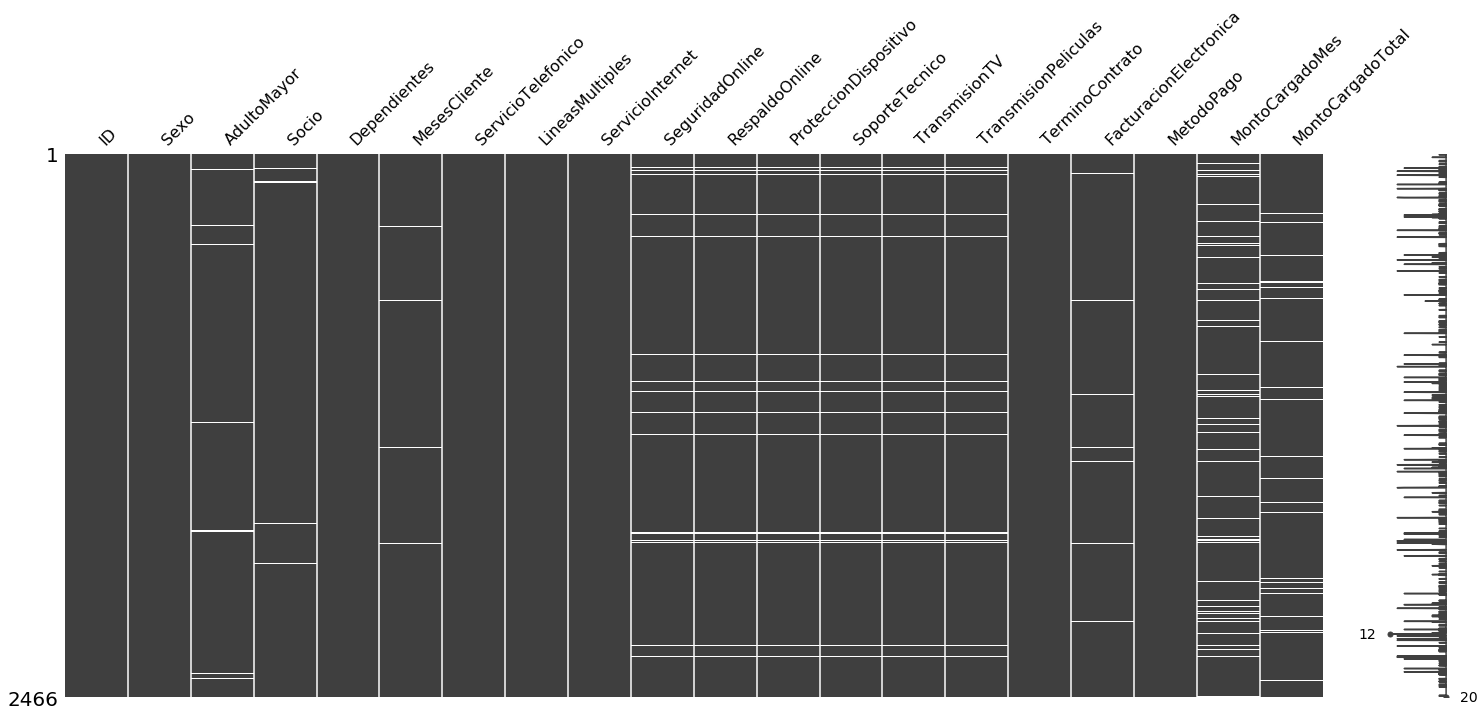

In [63]:
msno.matrix(df_test)

In [64]:
# No hay outliers

# 3) DATA PREPARATION

In [65]:
# Copy dataset and then apply transformation to copied dataset
ds_train = df_train.copy()

ds_test = df_test.copy()

## 3.1) Impute missings

In [66]:
# AdultoMayor (imputacion por MODA)
ds_train["AdultoMayor"].fillna(0, inplace = True)
ds_test["AdultoMayor"].fillna(0, inplace = True)

#Socio (imputacion por MODA)
ds_train["Socio"].fillna("No",inplace = True)
ds_test["Socio"].fillna("No",inplace = True)

# MesesCliente (imputacion por MEDIA)
ds_train["MesesCliente"].fillna(32, inplace = True)
ds_test["MesesCliente"].fillna(32, inplace = True)

#SeguridadOnline (imputacion por MODA)
ds_train["SeguridadOnline"].fillna("No", inplace = True)
ds_test["SeguridadOnline"].fillna("No", inplace = True)

#RespaldoOnline (imputacion por MODA)
ds_train["RespaldoOnline"].fillna("No", inplace = True)
ds_test["RespaldoOnline"].fillna("No", inplace = True)

# ProteccionDispositivo (imputacion por MODA)
ds_train["ProteccionDispositivo"].fillna('No', inplace = True)
ds_test["ProteccionDispositivo"].fillna('No', inplace = True)

# SoporteTecnico (imputacion por MODA)
ds_train["SoporteTecnico"].fillna('No', inplace = True)
ds_test["SoporteTecnico"].fillna('No', inplace = True)

# TransmisionTV (imputacion por MODA)
ds_train["TransmisionTV"].fillna('No', inplace = True)
ds_test["TransmisionTV"].fillna('No', inplace = True)

# TransmisionPeliculas (imputacion por MODA)
ds_train["TransmisionPeliculas"].fillna('No', inplace = True)
ds_test["TransmisionPeliculas"].fillna('No', inplace = True)

# TerminoContrato (imputacion por MODA)
ds_train["TerminoContrato"].fillna('Mes a mes', inplace = True)
ds_test["TerminoContrato"].fillna('Mes a mes', inplace = True)

# FacturacionElectronica (imputacion por MODA)
ds_train["FacturacionElectronica"].fillna('Si', inplace = True)
ds_test["FacturacionElectronica"].fillna('Si', inplace = True)

# MetodoPago (imputacion por MODA)
ds_train["MetodoPago"].fillna('Checke por correo', inplace = True)
ds_test["MetodoPago"].fillna('Checke por correo', inplace = True)

# MontoCargadoMes (imputacion por MEDIA)
ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
ds_test["MontoCargadoMes"].fillna(69.7, inplace = True)

# MontoCargadoTotal (imputacion por MEDIA)
ds_train["MontoCargadoTotal"].fillna(1987.4, inplace = True)
ds_test["MontoCargadoTotal"].fillna(2045.97, inplace = True)


## 3.2) Data Transformation

In [67]:
# ServicioTelefonico 
dicc_serv_telef = {'Si': 1, 'No':0 }
ds_train["ServicioTelefonico"] = ds_train["ServicioTelefonico"].map(dicc_serv_telef)
ds_test["ServicioTelefonico"] = ds_test["ServicioTelefonico"].map(dicc_serv_telef)

# Socio
dicc = {'Si': 1, 'No':0 }
ds_train["Socio"] = ds_train["Socio"].map(dicc)
ds_test["Socio"] = ds_test["Socio"].map(dicc)

# Dependientes
dicc = {'Si': 1, 'No':0 }
ds_train["Dependientes"] = ds_train["Dependientes"].map(dicc)
ds_test["Dependientes"] = ds_test["Dependientes"].map(dicc)

# Sexo
dicc = {'Masculino': 1, 'Femenino':0 }
ds_train["Sexo"] = ds_train["Sexo"].map(dicc)
ds_test["Sexo"] = ds_test["Sexo"].map(dicc)


# ServicioInternet 
dicc = {'Fibra Optica': 1, 'DSL':2, 'No':0 }
ds_train["ServicioInternet"] = ds_train["ServicioInternet"].map(dicc)
ds_test["ServicioInternet"] = ds_test["ServicioInternet"].map(dicc)


# TerminoContrato
dicc = {'Mes a mes': 0, 'Anual':1, 'Bianual':2 }
ds_train["TerminoContrato"] = ds_train["TerminoContrato"].map(dicc)
ds_test["TerminoContrato"] = ds_test["TerminoContrato"].map(dicc)

# FacturacionElectronica 
dicc_fact_elect = {'Si': 1, 'No':0 }
ds_train["FacturacionElectronica"] = ds_train["FacturacionElectronica"].map(dicc_fact_elect)
ds_test["FacturacionElectronica"] = ds_test["FacturacionElectronica"].map(dicc_fact_elect)

# Lineas Multiples
dicc_fact_elect = {'Si': 2, 'No':1 , "Sin servicio telefonico": 0}
ds_train['LineasMultiples'] = ds_train['LineasMultiples'].map(dicc_fact_elect)
ds_test['LineasMultiples'] = ds_test['LineasMultiples'].map(dicc_fact_elect)

# MetodoPago
dicc_fact_elect = {'Checke por correo': 0, 'Checke electronico':1 , "Tarjeta de credito (automatico)": 2,"Transferencia bancaria (automatico)":3}
ds_train['MetodoPago'] = ds_train['MetodoPago'].map(dicc_fact_elect)
ds_test['MetodoPago'] = ds_test['MetodoPago'].map(dicc_fact_elect)


# Mapeo multiple
list_cols = ['SeguridadOnline', 'RespaldoOnline', 'TransmisionTV',
       'TransmisionPeliculas',  'ProteccionDispositivo', 'SoporteTecnico']

dicc = {'Si': 2, 'No':1, 'Sin servicio de internet':0 }

for col in list_cols:
    
    ds_train[col] = ds_train[col].map(dicc)
    ds_test[col] = ds_test[col].map(dicc)



In [68]:
ds_train['AdultoMayor'] = ds_train['AdultoMayor'].astype(int)
ds_test['AdultoMayor'] = ds_test['AdultoMayor'].astype(int)

### Feature selection


In [69]:
ds_train.columns

Index(['ID', 'Sexo', 'AdultoMayor', 'Socio', 'Dependientes', 'MesesCliente',
       'ServicioTelefonico', 'LineasMultiples', 'ServicioInternet',
       'SeguridadOnline', 'RespaldoOnline', 'ProteccionDispositivo',
       'SoporteTecnico', 'TransmisionTV', 'TransmisionPeliculas',
       'TerminoContrato', 'FacturacionElectronica', 'MetodoPago',
       'MontoCargadoMes', 'MontoCargadoTotal', 'Churn'],
      dtype='object')

In [70]:
features_to_model = list(ds_train.columns)

features_to_model.remove(TARGET) # Eliminar variable Target
features_to_model.remove(ID) # Eliminar variable ID

list(features_to_model)

['Sexo',
 'AdultoMayor',
 'Socio',
 'Dependientes',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'ProteccionDispositivo',
 'SoporteTecnico',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago',
 'MontoCargadoMes',
 'MontoCargadoTotal']

In [71]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
X_train = ds_train[features_to_model]
y_train = ds_train[TARGET]

In [73]:
# Create  model objet 
model_tree = DecisionTreeClassifier(min_samples_leaf=20)

# Fit the model:
model_tree.fit(X_train, y_train)

model = model_tree

In [74]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)

In [75]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)

print("Accuracy - Train: {}".format(accuracy_train))


Accuracy - Train: 0.8271793751365524


In [76]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = (model.feature_importances_/model.feature_importances_.sum())*100
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato,39.358008
1,MontoCargadoMes,20.356281
2,MesesCliente,16.900983
3,MontoCargadoTotal,6.697066
4,ServicioInternet,3.098054
5,MetodoPago,2.108981
6,Sexo,2.008327
7,SeguridadOnline,1.882354
8,AdultoMayor,1.574887
9,FacturacionElectronica,1.305839


In [77]:
#Variables finales a usar (> 1% tanto en arbol de 20 y 10 minleaf)

features_to_model = ['Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioInternet',
 'SeguridadOnline',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago',
 'MontoCargadoMes',
 'MontoCargadoTotal']

In [78]:
ds_train = ds_train[features_to_model+[TARGET]]
ds_test = ds_test[features_to_model]

## 3.3) Feature Engineering

In [79]:
# New Feature 1
tmp_byAdultoMayor_medianMontoMes = ds_train.groupby(['AdultoMayor'])['MontoCargadoMes'].median().round()
tmp_byAdultoMayor_medianMontoMes

AdultoMayor
0    69.0
1    85.0
Name: MontoCargadoMes, dtype: float64

In [80]:
ds_train['flg_bySexo_mayorMedianMontoMes'] = ds_train.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

ds_test['flg_bySexo_mayorMedianMontoMes'] = ds_test.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

In [81]:
# Crear Features Dummies
#ds_train = pd.get_dummies(ds_train, columns=list_cols+["AdultoMayor","Socio","Dependientes","ServicioInternet","TerminoContrato","FacturacionElectronica","LineasMultiples","MetodoPago","Sexo","ServicioTelefonico"])
#ds_test = pd.get_dummies(ds_test, columns=list_cols+["AdultoMayor","Socio","Dependientes","ServicioInternet","TerminoContrato","FacturacionElectronica","LineasMultiples","MetodoPago","Sexo","ServicioTelefonico"])

ds_train = pd.get_dummies(ds_train, columns=['Sexo',
 'AdultoMayor',
 'ServicioInternet',
 'SeguridadOnline',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago'])

ds_test = pd.get_dummies(ds_test, columns=['Sexo',
 'AdultoMayor',
 'ServicioInternet',
 'SeguridadOnline',
 'TerminoContrato',
 'FacturacionElectronica',
 'MetodoPago'])

In [82]:
ds_train.shape, ds_test.shape

((4577, 24), (2466, 23))

In [83]:
ds_train.info(), ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4577 entries, 0 to 4576
Data columns (total 24 columns):
MesesCliente                      4577 non-null float64
MontoCargadoMes                   4577 non-null float64
MontoCargadoTotal                 4577 non-null float64
Churn                             4577 non-null int64
flg_bySexo_mayorMedianMontoMes    4577 non-null int64
Sexo_0                            4577 non-null uint8
Sexo_1                            4577 non-null uint8
AdultoMayor_0                     4577 non-null uint8
AdultoMayor_1                     4577 non-null uint8
ServicioInternet_0                4577 non-null uint8
ServicioInternet_1                4577 non-null uint8
ServicioInternet_2                4577 non-null uint8
SeguridadOnline_0                 4577 non-null uint8
SeguridadOnline_1                 4577 non-null uint8
SeguridadOnline_2                 4577 non-null uint8
TerminoContrato_0                 4577 non-null uint8
TerminoContrato_1      

(None, None)

In [86]:
# Features & Target
features = list(ds_train.columns)
features.remove(TARGET)

X = ds_train[features]
y = ds_train[TARGET]

X_summit = ds_test

print("train: ", X.shape,", summit: ", X_summit.shape)

train:  (4577, 23) , summit:  (2466, 23)


# 4) Modeling & Evaluation - Simple

## 4.1) Train & Test Split

In [87]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=9)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

(3203, 3203) (1374, 1374)


In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 2927 to 382
Data columns (total 23 columns):
MesesCliente                      3203 non-null float64
MontoCargadoMes                   3203 non-null float64
MontoCargadoTotal                 3203 non-null float64
flg_bySexo_mayorMedianMontoMes    3203 non-null int64
Sexo_0                            3203 non-null uint8
Sexo_1                            3203 non-null uint8
AdultoMayor_0                     3203 non-null uint8
AdultoMayor_1                     3203 non-null uint8
ServicioInternet_0                3203 non-null uint8
ServicioInternet_1                3203 non-null uint8
ServicioInternet_2                3203 non-null uint8
SeguridadOnline_0                 3203 non-null uint8
SeguridadOnline_1                 3203 non-null uint8
SeguridadOnline_2                 3203 non-null uint8
TerminoContrato_0                 3203 non-null uint8
TerminoContrato_1                 3203 non-null uint8
TerminoContrato_2    

## 4.2.A. LogisticRegression

### 4.2.1 Training

In [89]:
from sklearn.linear_model import LogisticRegression

# Create  model objet 
model_rlog = LogisticRegression(C=0.01, max_iter= 100, random_state=0, n_jobs = 4, penalty = 'l1')

# Fit the model:
model_rlog.fit(X_train, y_train)

model = model_rlog 

In [90]:
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(model_rlog.coef_[0],4) })
df_weights.sort_values("beta")

,feature,beta
17,FacturacionElectronica_0,-0.1752
0,MesesCliente,-0.0840
6,AdultoMayor_0,-0.0603
20,MetodoPago_1,0.0000
19,MetodoPago_0,0.0000
18,FacturacionElectronica_1,0.0000
16,TerminoContrato_2,0.0000
15,TerminoContrato_1,0.0000
14,TerminoContrato_0,0.0000
13,SeguridadOnline_2,0.0000


### 4.2.2 Evaluación del Modelo

In [91]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [92]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.7880112394630034
Accuracy - Test : 0.7758369723435226


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [93]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

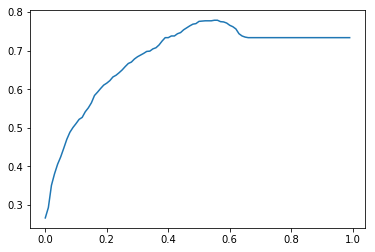

In [94]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [95]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.55


In [96]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.7901966906025601
Accuracy - Test : 0.7787481804949054


## 4.2.B. Decision Tree

### 4.2.1 Training

In [97]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [98]:
# Create  model objet 
model_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,random_state=0)

# Fit the model:
model_tree.fit(X_train, y_train)

model = model_tree

### 4.2.2 Evaluación del Modelo

In [99]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [100]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8151732750546363
Accuracy - Test : 0.7787481804949054


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [101]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

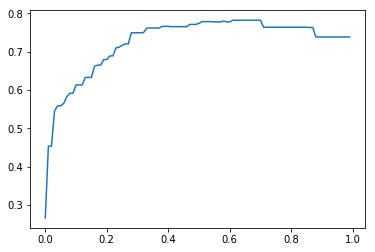

In [102]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [103]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.61


In [104]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8020605682172963
Accuracy - Test : 0.7823871906841339


### Feature Importances

In [105]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato_0,0.429884
1,MontoCargadoTotal,0.199893
2,ServicioInternet_1,0.157247
3,MontoCargadoMes,0.068979
4,MesesCliente,0.058790
5,AdultoMayor_1,0.021931
6,ServicioInternet_0,0.019109
7,AdultoMayor_0,0.011205
8,MetodoPago_0,0.010585
9,MetodoPago_3,0.008295


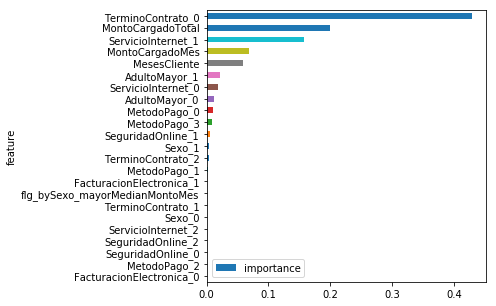

In [106]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

## 4.2.C. Random Forest

### 4.2.1 Training

In [107]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
# Create  model objet 
model_rf = RandomForestClassifier(n_estimators = 150, random_state = 0, max_depth=5, 
                                  max_features = 0.5, min_samples_leaf = 10, 
                                  n_jobs = -1)

# Fit the model:
model_rf.fit(X_train, y_train)

model = model_rf

### 4.2.2 Evaluación del Modelo

In [109]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [110]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8145488604433344
Accuracy - Test : 0.7838427947598253


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [111]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

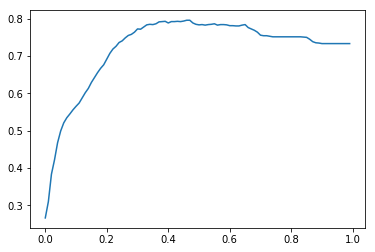

In [112]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [113]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.46


In [114]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8142366531376835
Accuracy - Test : 0.7962154294032023


### Feature Importances

In [115]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,TerminoContrato_0,0.255741
1,MesesCliente,0.221243
2,ServicioInternet_1,0.123855
3,MontoCargadoMes,0.099214
4,MontoCargadoTotal,0.092585
5,SeguridadOnline_1,0.078849
6,MetodoPago_0,0.021932
7,ServicioInternet_0,0.019829
8,TerminoContrato_2,0.017737
9,ServicioInternet_2,0.012510


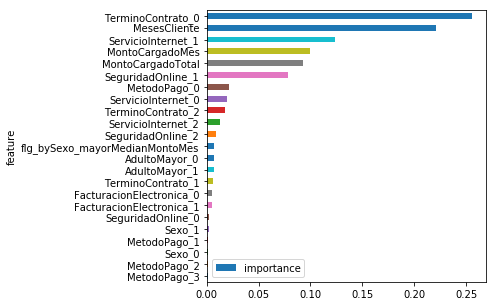

In [116]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

## 4.2.D. Random Forest con RandomSearchCV

In [172]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Create  model objet 
model_rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

parameters = {
    
    "n_estimators" : randint(130,160),
    "max_depth" : [4,5],
    "min_samples_leaf" : [10,15,20],
    "max_features" : [0.2,0.5]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(model_rf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### 4.2.2 Evaluación del Modelo

In [159]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [160]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8086169216359663
Accuracy - Test : 0.784570596797671


El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [161]:
list_accuracy_test = []
for threshold in range(0,100):
  pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
  list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

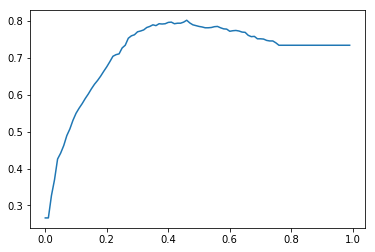

In [162]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [163]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

El mejor threshold es: 0.46


In [164]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

Accuracy - Train: 0.8117389946924758
Accuracy - Test : 0.8013100436681223


### Feature Importances

In [165]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

,feature,importance
0,MesesCliente,0.169569
1,TerminoContrato_0,0.154573
2,ServicioInternet_1,0.117580
3,MontoCargadoTotal,0.110231
4,SeguridadOnline_1,0.091977
5,MontoCargadoMes,0.068180
6,TerminoContrato_2,0.057090
7,MetodoPago_0,0.055810
8,ServicioInternet_0,0.042798
9,TerminoContrato_1,0.024526


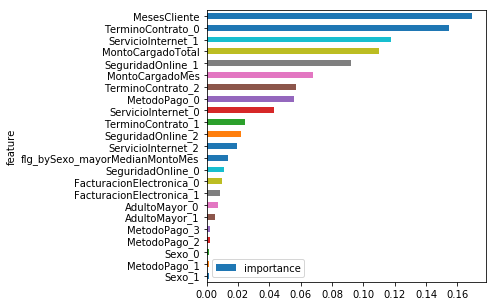

In [166]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

**MODELO FINAL**

Como se puede notar, de los algoritmos entrenados, el modelo basado en Random Forrest con CV es el ganador con un accuracy optimizado por el punto de corte (threhold: 0.46)

# Predicciones on Submission DS

In [167]:
pred_prob_subm = model.predict_proba(X_summit)[:,1]
pred_subm = [1 if x >= best_threshold else 0 for x in pred_prob_subm]

In [168]:
Y_summit_pred = pd.DataFrame()
Y_summit_pred[ID] = df_test[ID]
Y_summit_pred[TARGET] = pred_subm #pred_prob_subm
Y_summit_pred.head()

,ID,Churn
0,ID03436,0
1,ID05166,0
2,ID04004,1
3,ID05309,0
4,ID05434,0


To submission:

In [169]:
Y_summit_pred.to_csv("jdca_submission_05_rf_ransearch_cvdefault.csv", index = False)

In [170]:
!kaggle competitions submit -c dsrp-kaggle-semillero-01 -f jdca_submission_05_rf_ransearch_cvdefault.csv -m "Message"

Successfully submitted to DSRP - Kaggle Reuniones 1



  0%|          | 0.00/26.5k [00:00<?, ?B/s]
 30%|###       | 8.00k/26.5k [00:00<00:00, 24.3kB/s]
100%|##########| 26.5k/26.5k [00:00<00:00, 36.9kB/s]
